# Data Analysis of Movies

The data is basically about the movies' identity like title, director, etc. I found the data from data.world website. I'm going to explore the data and do some interesting calculations with it, the tools I'm using are pandas, matplotlib, seaborn and numpy. I used what I've learnt from http://zerotopandas.com and the libraries documentation to understand the tools and how to use it.

As a first step, let's upload our Jupyter notebook to [Jovian.ml](https://jovian.ml).

In [2]:
project_name = "Data Analysis of Movies" # change this

In [3]:
!pip install jovian --upgrade -q
!pip install xlrd

In [4]:
import jovian
import pandas as pd

In [5]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "arnoldchristopus2312/data-analysis-of-movies" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/arnoldchristopus2312/data-analysis-of-movies


'https://jovian.ml/arnoldchristopus2312/data-analysis-of-movies'

## Data Preparation and Cleaning

I'm going to analyse a movie dataset which contains the genre, language, etc. First I'm reading the data from a website using pd.read_csv. The pd.set_option is for setting the number of rows/colums being displayed by using display.max_colums or display.max_rows in the first argument to choose between rows/columns, and the number of the first and last orders you want to display (None means to display the entire rows/columns).  
  
Here i set to display the entire columns because only 2 of them aren't displayed meanwhile the rows are too many, so it's best to show only a few of them.

In [6]:
movies = pd.read_csv('https://query.data.world/s/pa635fkfnvcfevjj2h73elao32lonj')
pd.set_option('display.max_columns', None)
movies

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,NaN,NaN,NaN,7.0,7.0
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171,NaN,NaN,NaN,NaN,4.0,2.0
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,NaN,NaN,NaN,24.0,3.0
3,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2019,NaN,NaN,NaN,NaN,28.0,14.0
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,Gene Gauntier,Kalem Company,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,438,NaN,NaN,NaN,NaN,12.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81268,tt9903716,Jessie,Jessie,2019,2019-03-15,"Horror, Thriller",106,India,Telugu,Aswani Kumar V.,Aswani Kumar V.,Ekaa Art Production,"Sritha Chandana, Pavani Gangireddy, Abhinav Go...","Set in an abandoned house, the film follows a ...",7.2,219,NaN,NaN,NaN,NaN,21.0,NaN
81269,tt9905412,Ottam,Ottam,2019,2019-03-08,Drama,120,India,Malayalam,Zam,Rajesh k Narayan,Thomas Thiruvalla Films,"Nandu Anand, Roshan Ullas, Manikandan R. Achar...","Set in Trivandrum, the story of Ottam unfolds ...",7.8,510,INR 4000000,NaN,$ 4791,NaN,NaN,NaN
81270,tt9905462,Pengalila,Pengalila,2019,2019-03-08,Drama,111,India,Malayalam,T.V. Chandran,T.V. Chandran,Benzy Productions,"Lal, Akshara Kishor, Iniya, Narain, Renji Pani...",An unusual bond between a sixty year old Dalit...,8.4,604,INR 10000000,NaN,NaN,NaN,NaN,NaN
81271,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,"Vineesh Aaradya, Vineesh Aaradya",RMCC Productions,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",NaN,8.4,369,NaN,NaN,NaN,NaN,NaN,NaN


Some of the values are NaN, so I convert them into 0 using .fillna(0).

In [7]:
movies_df = movies.fillna(0)
movies_df

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,0,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,0,0,0.0,7.0,7.0
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",0,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171,0,0,0,0.0,4.0,2.0
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,0,0,0.0,24.0,3.0
3,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2019,0,0,0,0.0,28.0,14.0
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,Gene Gauntier,Kalem Company,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,438,0,0,0,0.0,12.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81268,tt9903716,Jessie,Jessie,2019,2019-03-15,"Horror, Thriller",106,India,Telugu,Aswani Kumar V.,Aswani Kumar V.,Ekaa Art Production,"Sritha Chandana, Pavani Gangireddy, Abhinav Go...","Set in an abandoned house, the film follows a ...",7.2,219,0,0,0,0.0,21.0,0.0
81269,tt9905412,Ottam,Ottam,2019,2019-03-08,Drama,120,India,Malayalam,Zam,Rajesh k Narayan,Thomas Thiruvalla Films,"Nandu Anand, Roshan Ullas, Manikandan R. Achar...","Set in Trivandrum, the story of Ottam unfolds ...",7.8,510,INR 4000000,0,$ 4791,0.0,0.0,0.0
81270,tt9905462,Pengalila,Pengalila,2019,2019-03-08,Drama,111,India,Malayalam,T.V. Chandran,T.V. Chandran,Benzy Productions,"Lal, Akshara Kishor, Iniya, Narain, Renji Pani...",An unusual bond between a sixty year old Dalit...,8.4,604,INR 10000000,0,0,0.0,0.0,0.0
81271,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,"Vineesh Aaradya, Vineesh Aaradya",RMCC Productions,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",0,8.4,369,0,0,0,0.0,0.0,0.0


I'm going to check the data's shape, info and description using .shape(), .info() and .describe().

In [8]:
movies_df.shape

(81273, 22)

In [9]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81273 entries, 0 to 81272
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          81273 non-null  object 
 1   title                  81273 non-null  object 
 2   original_title         81273 non-null  object 
 3   year                   81273 non-null  int64  
 4   date_published         81273 non-null  object 
 5   genre                  81273 non-null  object 
 6   duration               81273 non-null  int64  
 7   country                81273 non-null  object 
 8   language               81273 non-null  object 
 9   director               81273 non-null  object 
 10  writer                 81273 non-null  object 
 11  production_company     81273 non-null  object 
 12  actors                 81273 non-null  object 
 13  description            81273 non-null  object 
 14  avg_vote               81273 non-null  float64
 15  vo

In [10]:
movies_df.describe()

,year,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics
count,81273.000000,81273.000000,81273.000000,8.127300e+04,81273.000000,81273.000000,81273.000000
mean,1993.007210,100.565981,5.926587,9.421771e+03,8.728766,39.943302,24.208519
std,23.992284,25.320189,1.243315,5.220245e+04,21.445498,153.280211,55.429016
min,1906.000000,40.000000,1.000000,9.900000e+01,0.000000,0.000000,0.000000
25%,1979.000000,88.000000,5.200000,2.060000e+02,0.000000,2.000000,2.000000
50%,2002.000000,96.000000,6.100000,4.950000e+02,0.000000,8.000000,6.000000
75%,2012.000000,108.000000,6.800000,1.865000e+03,0.000000,23.000000,20.000000
max,2019.000000,3360.000000,10.000000,2.159628e+06,100.000000,8302.000000,987.000000


Movies usually are 1-3 hours long, so I'm going to drop the ones above 200 minutes.

In [11]:
movies_df.drop(movies_df[movies_df.duration > 200].index, inplace = True)

In [12]:
import jovian

In [13]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "arnoldchristopus2312/data-analysis-of-movies" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/arnoldchristopus2312/data-analysis-of-movies


'https://jovian.ml/arnoldchristopus2312/data-analysis-of-movies'

## Exploratory Analysis and Visualization

First, I'm importing the necessary libraries for plotting such as seaborn, matplotlib and numpy. Then I'm changing the configurations to my own preferences and it's optional.  
plt.style.use sets the background color of the graphs, I chose dark background to reduce eye strains.  
matplotlib.rcParams handles the default configuration of the plots.

In [14]:
# Importing Libraries
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Configurations (Optional)
plt.style.use('dark_background')
matplotlib.rcParams['font.size'] = 14

The first data I'm going to explore is movie genre. I'm going to pick 20 highest number of movie genres using .value_counts to count the amount of each genres and .head to pick the 20 highest ones.

In [15]:
top_genre = movies_df.genre.value_counts().head(20)
top_genre

Drama                     11769
Comedy                     7320
Comedy, Drama              3819
Drama, Romance             3245
Comedy, Romance            2381
Horror                     2189
Comedy, Drama, Romance     2172
Drama, Thriller            1270
Crime, Drama               1270
Action, Crime, Drama       1239
Horror, Thriller           1197
Thriller                   1156
Crime, Drama, Thriller      952
Action, Drama               820
Drama, War                  722
Action                      693
Crime, Drama, Mystery       605
Western                     595
Comedy, Crime               570
Comedy, Horror              547
Name: genre, dtype: int64

After that I'm plotting the bar graph using barplot from seaborn library.  
plt.xticks rotates the x-axis so that the texts don't overlap with each others.

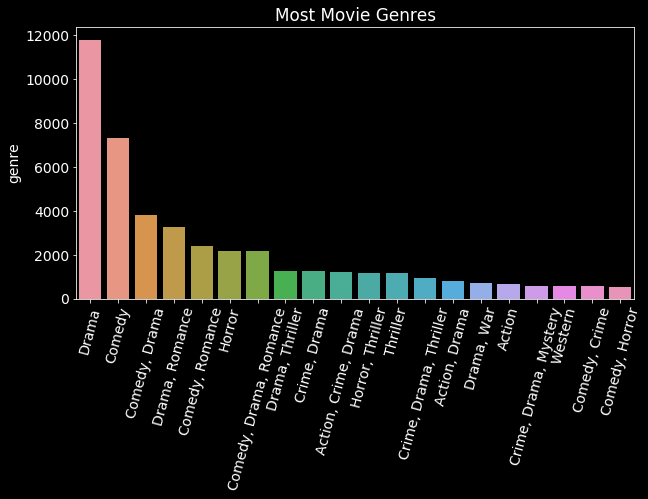

In [16]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=75)
plt.title('Most Movie Genres')
sns.barplot(top_genre.index, top_genre);

Drama genre has the most amount of movies followed by comedy. Most movies have dramatic scenes such as conflicts, etc, character developments and other drama elements which makes the movies fall into the drama category. The same goes to comedy since the movies I've seen so far have comedic elements where the characters tell jokes, make silly mistakes and others. The third most genre is drama and comedy, which is the combination of the top 2 genres.

The next data to analyze is the release years, this time I'm using histogram instead of bar graphs because these are continuous and quantitative variables as opposed to categorical ones. A histogram can be plotted by using plt.hist and the intervals can be set using bins.

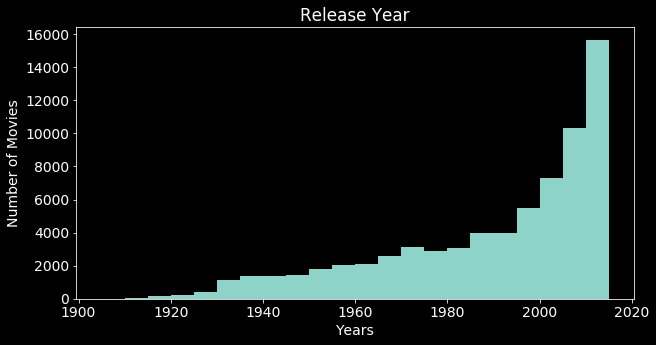

In [17]:
plt.figure(figsize=(10,5))
plt.title('Release Year')
plt.xlabel('Years')
plt.ylabel('Number of Movies')
plt.hist(movies_df['year'], bins=np.arange(1905,2020,5));

As you can see, the number increases as the year goes by. This shows that the entertainment industry is getting more popular nowadays as more technologies are being invented for animating, adding special effects, etc compared to years ago where we had limited access to technologies related to movie-making and platforms to watch movies.

The next data is country column, I'm picking 20 countries with the highest number of released movies. The codes are similar to the ones for movie genres.

In [18]:
top_countries = movies_df['country'].value_counts().head(20)
top_countries

USA             27408
India            5513
UK               3859
France           2961
Japan            2842
Italy            2280
Canada           1705
Germany          1340
Turkey           1217
Hong Kong        1211
Spain            1147
South Korea      1045
Australia         747
Russia            722
Soviet Union      707
Brazil            679
UK, USA           679
Sweden            602
Mexico            592
Iran              580
Name: country, dtype: int64

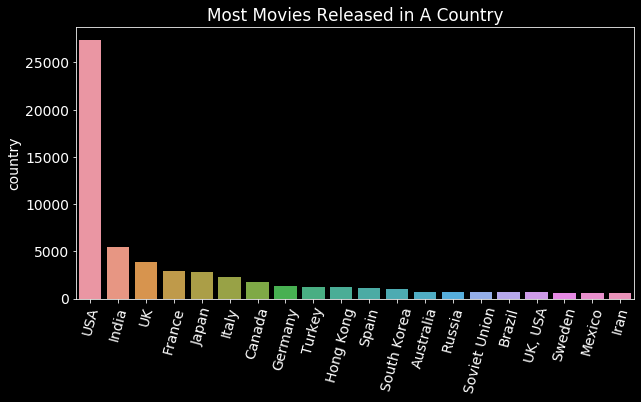

In [19]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=75)
plt.title('Most Movies Released in A Country')
sns.barplot(top_countries.index, top_countries);

The top country is USA which is not a surprise since USA is the major money making market. This shows that USA is an ideal place for filming especially Los Angeles, the home of one of the most popular film industry, Hollywood.

The next one is the distribution of movie duration using similar codes as the release years.

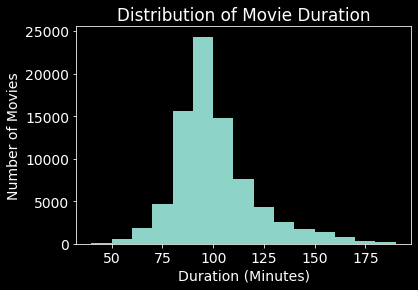

In [20]:
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Number of Movies')
plt.hist(movies_df['duration'], bins=np.arange(40,200,10));

From the histogram above, the average duration of a movie is around 80-110 minutes long

In [21]:
import jovian

In [22]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "arnoldchristopus2312/data-analysis-of-movies" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/arnoldchristopus2312/data-analysis-of-movies


'https://jovian.ml/arnoldchristopus2312/data-analysis-of-movies'

## Asking and Answering Questions

On this section, I'm going to ask 5 questions that I found interesting and hard for me to solve.

## Q1 : How many movies' title is different than the original one and how many of them are in English language?

This one is very simple to do, pick the title, original title and language column with the condition that the title is unequal to the original title. I set the conditions to lowercase using .str.lower() because the only the first letter of the original title is capitalized while the first letters of each word of title are capitalized. The .lower() sets every letters to lowercase so that the difference in capitalization won't be included.

In [23]:
title_df = movies_df[movies_df.title.str.lower() != movies_df.original_title.str.lower()].title
original_df = movies_df[movies_df.title.str.lower() != movies_df.original_title.str.lower()].original_title
language_df = movies_df[movies_df.title.str.lower() != movies_df.original_title.str.lower()].language

After that I set the display to show the entire rows to see all the differences, and then I combine the title, original title and language using pd.concat which basically concatenates rows/columns. The axis is 1 because I'm combining them into columns.

In [24]:
combined_df = pd.concat([title_df,original_df,language_df], axis=1)
combined_df

,title,original_title,language
284,Nosferatu,"Nosferatu, eine Symphonie des Grauens",German
2556,The Grand Illusion,La grande illusion,"French, German, English, Russian"
2633,Humanity and Paper Balloons,Ninjô kami fûsen,Japanese
3286,The Story of the Last Chrysanthemums,Zangiku monogatari,Japanese
6451,Early Summer,Bakushû,"Japanese, English"
...,...,...,...
76715,Kadvi Hawa,Dark wind,Hindi
77919,Streaker,Flitzer,"Swiss German, German"
78991,Women of Mafia,Kobiety mafii,"Polish, English"
79557,Tzamaika,Jamaica,Greek


We can see from the dataframe that the majority of them aren't in English. Next, we're going to calculate the precentage of the difference and english language.  
For the difference one I divided the the number of title from the combined data with the total number of title and multiply it by 100 to get percentage.  
For the english one I divided the number of english language with the total number of language in the combined data and multiply it by 100.

In [25]:
# Calculations
total_differences = combined_df.title.count() * 100 / movies_df.title.count()
english_language = combined_df.language[combined_df.language == 'English'].count() * 100 / combined_df.language.count()

# Printing
print(total_differences, '% of the movies title is different than the original.\n',
     english_language, '% of the different movies title is in English language.')

0.18508236165093467 % of the movies title is different than the original.
 2.0 % of the different movies title is in English language.


Only 0.19% of the total movies have different title than the original one because the movies are in their country's language and they used a different title for international people that speaks different language.  
1.96% of the languages are in pure English, the reason for the different title is probably because the English word may not be known generally by international people, so they use simple words instead.

# Q2 : Which month of the year is the most profitable when releasing a movie?

The first thing to do is to convert the numbers inside the date_published column into datetime format using pd.to_datetime. The format I'm using is %Y-%m-%d, there are other formats that you can find too. After that I'm picking the month only using df.dt.month.

In [26]:
# Change to date_time
date_df = pd.to_datetime(movies_df['date_published'], format = "%Y-%m-%d")

# Grab the month only
month_df = date_df.dt.month
month_df

0        12
1         8
2        11
3         3
4         1
         ..
81268     3
81269     3
81270     3
81271     3
81272     3
Name: date_published, Length: 81045, dtype: int64

Then I plot the distribution using histogram with the interval of 1 because I'm comparing each month.

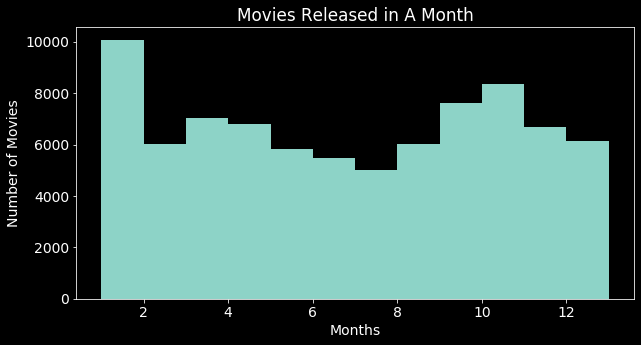

In [27]:
plt.figure(figsize=(10,5))
plt.title('Movies Released in A Month')
plt.xlabel('Months')
plt.ylabel('Number of Movies')
plt.hist(month_df, bins=np.arange(1,14,1));

From the histogram above, January has the most movies released, this shows that there are a lot of competitions in this month. Having a lot of competitions is very risky as we have to fight with more movies. July on the other hand has the least amount of releases, this means that not many movies are released during this month, so we have less competitions. July is also part of the summer holiday which is around June-August. People during holidays have more free time which means they will probably go to movies more than regular days. This shows that releasing a movie on July is the most profitable one.

# Q3 : How many movies' director is also a writer?

This is a rather simple thing to do as we only need to get the director and writer columns with the condition that the director is the same as the writer.  
Then we calculate the percentage of the same director and writer.

In [28]:
director_df = movies_df[movies_df.director == movies_df.writer].director
writer_df = movies_df[movies_df.director == movies_df.writer].writer

direct_write = pd.concat([director_df, writer_df], axis=1)
direct_write

,director,writer
0,Charles Tait,Charles Tait
13,Alfred Machin,Alfred Machin
24,Léonce Perret,Léonce Perret
28,"Henrik Galeen, Paul Wegener","Henrik Galeen, Paul Wegener"
31,Lois Weber,Lois Weber
...,...,...
81256,Jason Mills,Jason Mills
81266,Hatef Alimardani,Hatef Alimardani
81267,Lokesh Kanagaraj,Lokesh Kanagaraj
81268,Aswani Kumar V.,Aswani Kumar V.


In [29]:
direct_write_percentage = direct_write.shape[0] * 100 / movies_df.shape[0]

print(direct_write_percentage, '% of the directors are also writers of the same movie.')

20.535504966376703 % of the directors are also writers of the same movie.


# Q4 : How many movies from USA, UK and Australia aren't in pure English language(no other languages involved)?

Firstly, I'm counting the total number of the movies from the 3 countries by using count(). After that I'm removing all rows with English language using the condition where the language isn't equal to English.

In [30]:
eng_usa = movies_df[movies_df.country == 'USA'].country.count()
eng_uk = movies_df[movies_df.country == 'UK'].country.count()
eng_australia = movies_df[movies_df.country == 'Australia'].country.count()

print(' USA movies : ',eng_usa, '\n',
      'UK movies :', eng_uk, '\n',
      'Australia movies :', eng_australia)

 USA movies :  27408 
 UK movies : 3859 
 Australia movies : 747


In [31]:
not_english = movies_df[movies_df.language != 'English']
not_english

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,0,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,0,0,0.0,7.0,7.0
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",0,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171,0,0,0,0.0,4.0,2.0
3,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2019,0,0,0,0.0,28.0,14.0
5,tt0002423,Madame DuBarry,Madame DuBarry,1919,1919-11-26,"Biography, Drama, Romance",85,Germany,German,Ernst Lubitsch,"Norbert Falk, Hanns Kräly",Projektions-AG Union (PAGU),"Pola Negri, Emil Jannings, Harry Liedtke, Edua...","The story of Madame DuBarry, the mistress of L...",6.8,709,0,0,0,0.0,11.0,9.0
6,tt0002445,Quo Vadis?,Quo Vadis?,1913,1913-03-01,"Drama, History",120,Italy,Italian,Enrico Guazzoni,"Henryk Sienkiewicz, Enrico Guazzoni",Società Italiana Cines,"Amleto Novelli, Gustavo Serena, Carlo Cattaneo...","An epic Italian film ""Quo Vadis"" influenced ma...",6.2,241,ITL 45000,0,0,0.0,6.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81268,tt9903716,Jessie,Jessie,2019,2019-03-15,"Horror, Thriller",106,India,Telugu,Aswani Kumar V.,Aswani Kumar V.,Ekaa Art Production,"Sritha Chandana, Pavani Gangireddy, Abhinav Go...","Set in an abandoned house, the film follows a ...",7.2,219,0,0,0,0.0,21.0,0.0
81269,tt9905412,Ottam,Ottam,2019,2019-03-08,Drama,120,India,Malayalam,Zam,Rajesh k Narayan,Thomas Thiruvalla Films,"Nandu Anand, Roshan Ullas, Manikandan R. Achar...","Set in Trivandrum, the story of Ottam unfolds ...",7.8,510,INR 4000000,0,$ 4791,0.0,0.0,0.0
81270,tt9905462,Pengalila,Pengalila,2019,2019-03-08,Drama,111,India,Malayalam,T.V. Chandran,T.V. Chandran,Benzy Productions,"Lal, Akshara Kishor, Iniya, Narain, Renji Pani...",An unusual bond between a sixty year old Dalit...,8.4,604,INR 10000000,0,0,0.0,0.0,0.0
81271,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,"Vineesh Aaradya, Vineesh Aaradya",RMCC Productions,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",0,8.4,369,0,0,0,0.0,0.0,0.0


As you can see, we have 0 in language, so I removie them by using the same method.

In [32]:
not_zero = not_english[not_english.language != 0]
not_zero[not_zero.country == 'USA']

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
232,tt0012190,The Four Horsemen of the Apocalypse,The Four Horsemen of the Apocalypse,1921,1923-01-08,"Drama, Romance, War",150,USA,None,Rex Ingram,"Vicente Blasco Ibáñez, June Mathis",Metro Pictures Corporation,"Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",An extended family split up in France and Germ...,7.2,2935,$ 800000,$ 9183673,$ 9183673,0.0,44.0,16.0
250,tt0012642,A Sailor-Made Man,A Sailor-Made Man,1921,1921-12-25,Comedy,47,USA,"None, English",Fred C. Newmeyer,"Hal Roach, Sam Taylor",Hal Roach Studios,"Harold Lloyd, Mildred Davis, Noah Young, Dick ...","An idle, wealthy playboy foolishly joins the N...",7.0,901,0,0,0,0.0,13.0,5.0
288,tt0013515,The Prisoner of Zenda,The Prisoner of Zenda,1922,1922-09-11,"Adventure, Romance",125,USA,None,Rex Ingram,"Anthony Hope, Mary O'Hara",Metro Pictures Corporation,"Lewis Stone, Alice Terry, Robert Edeson, Stuar...",When the king is drugged and abducted by his a...,6.7,419,$ 323062,0,0,0.0,15.0,5.0
321,tt0014440,Scaramouche,Scaramouche,1923,1929-05-31,"Drama, Romance",124,USA,"None, English, French",Rex Ingram,"Rafael Sabatini, Willis Goldbeck",Metro Pictures Corporation,"Lloyd Ingraham, Alice Terry, Ramon Novarro, Le...","When a nobleman murders his best friend, a law...",7.0,466,$ 858723,0,0,0.0,15.0,4.0
351,tt0015002,Hot Water,Hot Water,1924,1924-10-26,Comedy,60,USA,"None, English","Fred C. Newmeyer, Sam Taylor","Sam Taylor, John Grey",The Harold Lloyd Corporation,"Harold Lloyd, Jobyna Ralston, Josephine Crowel...",Episodic look at married life and in-law probl...,7.2,1161,0,0,0,0.0,19.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80255,tt8328612,Seder-Masochism,Seder-Masochism,2018,2019-01-31,Animation,78,USA,"English, French, Bulgarian, Hebrew, Aramaic",Nina Paley,Nina Paley,0,"Barry Gray, Hiram Paley, Nina Paley",Loosely following a traditional Passover Seder...,7.1,139,$ 20000,0,0,0.0,3.0,5.0
80323,tt8394314,Witnesses,Witnesses,2019,2019-09-09,"Crime, Horror, Thriller",97,USA,"English, Spanish",Christopher Burgart,Christopher Burgart,Archon Entertainment,"Jesse Howland, Conner Floyd, Rachel Clark-Spea...",Four college classmates are hunted by a ruthle...,6.1,902,0,0,0,0.0,16.0,1.0
80536,tt8637428,The Farewell,The Farewell,2019,2019-09-20,"Comedy, Drama",100,USA,"Mandarin, English, Japanese, Italian",Lulu Wang,Lulu Wang,Big Beach Films,"Shuzhen Zhao, Awkwafina, X Mayo, Hong Lu, Hong...",A Chinese family discovers their grandmother h...,7.9,12259,0,$ 17695781,$ 19602064,89.0,131.0,153.0
80651,tt8760550,Nazi Overlord,Nazi Overlord,2018,2018-11-13,"Action, Adventure, Horror",91,USA,"English, German, Romanian",Rob Pallatina,Scotty Mullen,The Asylum,"Tom Sizemore, Dominique Swain, Andrew Liberty,...",A D-Day rescue mission turns ugly when a band ...,2.1,569,$ 500000,0,0,0.0,28.0,4.0


Now, there are 'None' and 'None, English' in the language which is going to be removed also.  
Then I'm picking the country and language columns and merge them together. I want to see the USA country first, so I'm setting the condition of the country to be USA and this should give us USA country only.

In [33]:
# Removing None and English
not_none1 = not_zero[not_zero != 'None']
not_none = not_none1[not_none1 != 'None, English']

# Picking the country and language columns while dropping out any possible NaN values
not_eng_usa = not_none[not_none.country == 'USA'].dropna(0).country
not_eng_lang = not_none[not_none.country == 'USA'].dropna(0).language

# Merging the columns
not_eng_usa_list = pd.concat([not_eng_usa, not_eng_lang], axis=1)
not_eng_usa_list

C:\Users\asus1\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,country,language
321,USA,"None, English, French"
408,USA,"English, Greek"
422,USA,"English, Yiddish"
453,USA,"English, German"
518,USA,"English, Spanish"
...,...,...
80255,USA,"English, French, Bulgarian, Hebrew, Aramaic"
80323,USA,"English, Spanish"
80536,USA,"Mandarin, English, Japanese, Italian"
80651,USA,"English, German, Romanian"


For UK and Australia, I use the same method and change the country condition to UK and Australia accordingly

In [34]:
not_eng_uk = not_none[not_none.country == 'UK'].dropna(0).country
not_eng_lang = not_none[not_none.country == 'UK'].dropna(0).language
not_eng_uk_list = pd.concat([not_eng_uk, not_eng_lang], axis=1)
not_eng_uk_list

,country,language
1346,UK,"English, French, Italian"
1582,UK,"English, German"
1695,UK,"English, French"
1803,UK,"English, German, Italian, French"
1865,UK,"English, French"
...,...,...
77605,UK,"English, Italian"
78031,UK,"English, French"
79128,UK,"English, French"
79295,UK,"English, Welsh"


In [35]:
not_eng_australia = not_none[not_none.country == 'Australia'].dropna(0).country
not_eng_lang = not_none[not_none.country == 'Australia'].dropna(0).language
not_eng_australia_list = pd.concat([not_eng_australia, not_eng_lang], axis=1)
not_eng_australia_list

,country,language
16551,Australia,"English, French"
17438,Australia,"English, Italian, Aboriginal"
17587,Australia,"English, Aboriginal"
18605,Australia,"English, Afrikaans"
20244,Australia,"German, English"
...,...,...
76234,Australia,"English, Chinese, Persian"
78286,Australia,"English, Aboriginal"
78481,Australia,"English, Pushto"
79291,Australia,"English, Aboriginal, French"


After having the 3 countries list, I'm calculating the percentage using the total of nonenglish movies divided by the total movies of the country.

In [36]:
not_eng_usa_percentage = not_eng_usa.count() * 100 / eng_usa
not_eng_uk_percentage = not_eng_uk.count() * 100 / eng_uk
not_eng_australia_percentage = not_eng_australia.count() * 100 / eng_australia

print(not_eng_usa_percentage, '% of USA movies do not use pure English.\n',
     not_eng_uk_percentage, '% of UK movies do not use pure English.\n',
     not_eng_australia_percentage, '% of Australia movies do not use pure English.')

11.627991827203736 % of USA movies do not use pure English.
 11.427831044311999 % of UK movies do not use pure English.
 10.441767068273093 % of Australia movies do not use pure English.


# Q5 : Which company has the largest gap between the newest and the oldest release?

The first thing to do is to take the company and the year column as a simplification and we don't need the rest of the columns.

In [37]:
df = pd.concat([movies_df.production_company,movies_df.year], axis = 1)
df

,production_company,year
0,J. and N. Tait,1906
1,Fotorama,1911
2,Helen Gardner Picture Players,1912
3,Milano Film,1911
4,Kalem Company,1912
...,...,...
81268,Ekaa Art Production,2019
81269,Thomas Thiruvalla Films,2019
81270,Benzy Productions,2019
81271,RMCC Productions,2019


I'm grouping the production company and then pick the minimum and maximum year of each company using min() and max(). The reset_index() is to reset the index and use the default one instead.  
Then I'm merging them with the respective company and rename the columns to production company, oldest release and newest release.

In [38]:
# Grouping
df1 = df.groupby("production_company")

# Picking the minimun and maximum year
df_min = df1.min()
df_min = df_min.reset_index()
df_max = df1.max()
df_max = df_max.reset_index()

# Merging and columns renaming
df_merged = pd.concat([df_min,df_max.year], axis = 1)
df_merged.columns = ['production_company', 'oldest_release', 'newest_release']
df_merged = df_merged[df_merged.production_company != 0]
df_merged

,production_company,oldest_release,newest_release
1,"""DIA"" Productions GmbH & Co. KG",2003,2003
2,"""DumBeast"" Partners",2009,2009
3,"""G"" P.C. S.A.",1987,1987
4,"""GREEN"" Productions",2016,2017
5,"""Mi"" Production Studio",2004,2004
...,...,...,...
30085,Özminimalist Film,2014,2014
30086,Új Budapest Filmstudió,2004,2015
30087,Új Dialóg Stúdió,2003,2003
30088,Üçgen Yapimevi,2011,2014


The next step is to subtract the newest release column with the oldest release column to get the year gap of the oldest and newest movie of each company.

In [39]:
year_gap = df_merged['newest_release'] - df_merged['oldest_release']
year_gap

1         0
2         0
3         0
4         1
5         0
         ..
30085     0
30086    11
30087     0
30088     3
30089     0
Length: 30089, dtype: int64

The result is then merged with the company and the columns become production company and year gap.

In [40]:
result_df = pd.concat([df_merged.production_company, year_gap], axis=1)
result_df.columns = ['production_company', 'year_gap']
result_df

,production_company,year_gap
1,"""DIA"" Productions GmbH & Co. KG",0
2,"""DumBeast"" Partners",0
3,"""G"" P.C. S.A.",0
4,"""GREEN"" Productions",1
5,"""Mi"" Production Studio",0
...,...,...
30085,Özminimalist Film,0
30086,Új Budapest Filmstudió,11
30087,Új Dialóg Stúdió,0
30088,Üçgen Yapimevi,3


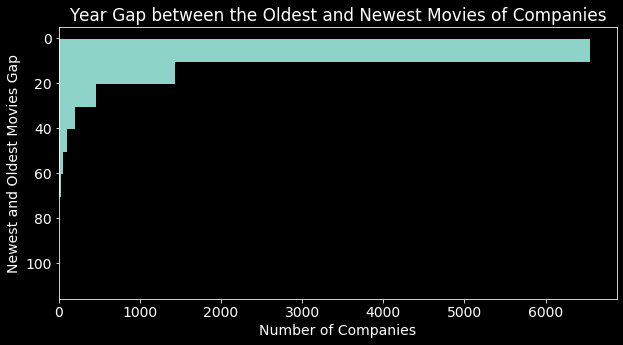

In [41]:
plt.figure(figsize=(10,5))
plt.title('Year Gap between the Oldest and Newest Movies of Companies')
plt.xlabel('Number of Companies')
plt.ylabel('Newest and Oldest Movies Gap')

# Switching the x and y axis
plt.hist(result_df.year_gap, bins=np.arange(0.5,120,10), orientation = 'horizontal')
# The orientation causes the y-axis to start from right to left

# Flipping the y-axis
plt.gca().invert_yaxis();

From the list of gaps, I choose the biggest gap by picking the data with the condition of the maximum value of the year gap.

In [42]:
biggest_gap = result_df[result_df.year_gap == year_gap.max()]
biggest_gap

,production_company,year_gap
21141,Nordisk Film,103
22089,Paramount Pictures,103


There are 2 companies with the biggest year gap, they are Nordisk Film and Paramount Pictures.These make sense as they are in the top 5 oldest film studios.

In [43]:
import jovian

In [44]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "arnoldchristopus2312/data-analysis-of-movies" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/arnoldchristopus2312/data-analysis-of-movies


'https://jovian.ml/arnoldchristopus2312/data-analysis-of-movies'

## Inferences and Conclusion

According to the analysis above, we've concluded several things :

1. There are so many combinations of genres which makes the movies diverse.  
2. Film industry is getting more popular as years go by since movies become more accessible and film technologies are also growing.  
3. USA is the most ideal country to shoot a film and the majority of the movies are from USA. It is also the home of well-known studios like Hollywood.  
4. The preferred duration for a movie is around 80-110 minutes.  
5. It is uncommon to have more than 1 title for a movie. This usually happens with the original titles that may not be understood by others, hence the different title.  
6. Summertime is the least competitive period when releasing movies because of the low amount of releases compared to other months. We can take advantage of the low competition and summer holidays.  
7. Scriptwriter can also become a movie director and vice versa provided that they know how to do both.  
8. Sometimes movies from a country use different language. One of the reason if probably due to the plots, for example the story takes place in another country, etc.  
9. The biggest gap between the newest and oldest movies of a company is 103 years. Most of the gaps are less than 10 years, the companies either quit after a short while or just started recently.

In [45]:
import jovian

In [46]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "arnoldchristopus2312/data-analysis-of-movies" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/arnoldchristopus2312/data-analysis-of-movies


'https://jovian.ml/arnoldchristopus2312/data-analysis-of-movies'

## References and Future Work

Ideas for future work :  
1. Analysing dataset of drama series, which has episodes, seasons, channels, running time per episode, etc.  
2. For Q4 you can choose other countries or languages (I used USA, UK, Australia and English).  
3. Find the datas for budget and income since almost all of them are empty in this dataset.  
4. Analysing the votes, metascore and reviews.

References :  
1. IMDB Movies Dataset : https://data.world/mahe432/movies
2. Pandas guide : https://pandas.pydata.org/docs/user_guide/index.html
3. Matplotlib guide: https://matplotlib.org/3.3.1/users/index.html
4. Seaborn guide & tutorial: https://seaborn.pydata.org/tutorial.html

In [47]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
